In [44]:
""" LSTM prediction: stacked LSTM """

# import libraries
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

In [45]:
rain_data = pd.read_csv('rain_day.csv', encoding='utf-8')
dam_data = pd.read_csv('dam_edit.csv', encoding='utf-8')

In [46]:
data = []

In [47]:
data = pd.merge( dam_data,rain_data, on='date', how='inner')

In [48]:
data = data.fillna(0)

In [49]:
print(data)

       Unnamed: 0        date  dam_t-1    90  100  101  211  212
0               0  1974-01-01    0.000   0.0  0.0  0.0  0.0  0.0
1               1  1974-01-02   10.000   0.0  0.0  0.0  0.0  0.0
2               2  1974-01-03    9.000   0.0  0.0  0.0  0.0  0.0
3               3  1974-01-04    4.800   0.0  0.0  0.0  0.0  0.0
4               4  1974-01-05    6.100   0.0  0.0  0.0  0.0  0.0
...           ...         ...      ...   ...  ...  ...  ...  ...
18257       18257  2023-12-27   30.518   0.0  0.0  0.0  0.0  0.0
18258       18258  2023-12-28   25.873   0.0  0.0  0.0  0.0  0.0
18259       18259  2023-12-29   21.186   0.0  0.0  0.0  0.0  0.0
18260       18260  2023-12-30   20.887   0.7  2.3  9.9  6.8  8.5
18261       18261  2023-12-31   29.183  26.8  6.0  5.3  3.1  4.9

[18262 rows x 8 columns]


In [50]:
compare_data = data

In [51]:
print(dam_data)

       Unnamed: 0        date  dam_t-1
0               0  1974-01-01    0.000
1               1  1974-01-02   10.000
2               2  1974-01-03    9.000
3               3  1974-01-04    4.800
4               4  1974-01-05    6.100
...           ...         ...      ...
18257       18257  2023-12-27   30.518
18258       18258  2023-12-28   25.873
18259       18259  2023-12-29   21.186
18260       18260  2023-12-30   20.887
18261       18261  2023-12-31   29.183

[18262 rows x 3 columns]


In [52]:
dam_data = dam_data.drop('Unnamed: 0', axis = 1)

In [53]:
dam = dam_data.drop('date', axis= 1)

In [54]:
print(rain_data)

             date    90  100  101  211  212
0      1974-01-01   0.0  0.0  0.0  0.0  0.0
1      1974-01-02   0.0  0.0  0.0  0.0  0.0
2      1974-01-03   0.0  0.0  0.0  0.0  0.0
3      1974-01-04   0.0  0.0  0.0  0.0  0.0
4      1974-01-05   0.0  0.0  0.0  0.0  0.0
...           ...   ...  ...  ...  ...  ...
18257  2023-12-27   0.0  0.0  0.0  0.0  0.0
18258  2023-12-28   0.0  0.0  0.0  0.0  0.0
18259  2023-12-29   0.0  0.0  0.0  0.0  0.0
18260  2023-12-30   0.7  2.3  9.9  6.8  8.5
18261  2023-12-31  26.8  6.0  5.3  3.1  4.9

[18262 rows x 6 columns]


In [55]:
original_dam = data['dam_t-1']

In [56]:
print(original_dam)

0         0.000
1        10.000
2         9.000
3         4.800
4         6.100
          ...  
18257    30.518
18258    25.873
18259    21.186
18260    20.887
18261    29.183
Name: dam_t-1, Length: 18262, dtype: float64


In [57]:
# separate dates for future plotting
dates = pd.to_datetime(data['date'])

In [58]:
print(data)

       Unnamed: 0        date  dam_t-1    90  100  101  211  212
0               0  1974-01-01    0.000   0.0  0.0  0.0  0.0  0.0
1               1  1974-01-02   10.000   0.0  0.0  0.0  0.0  0.0
2               2  1974-01-03    9.000   0.0  0.0  0.0  0.0  0.0
3               3  1974-01-04    4.800   0.0  0.0  0.0  0.0  0.0
4               4  1974-01-05    6.100   0.0  0.0  0.0  0.0  0.0
...           ...         ...      ...   ...  ...  ...  ...  ...
18257       18257  2023-12-27   30.518   0.0  0.0  0.0  0.0  0.0
18258       18258  2023-12-28   25.873   0.0  0.0  0.0  0.0  0.0
18259       18259  2023-12-29   21.186   0.0  0.0  0.0  0.0  0.0
18260       18260  2023-12-30   20.887   0.7  2.3  9.9  6.8  8.5
18261       18261  2023-12-31   29.183  26.8  6.0  5.3  3.1  4.9

[18262 rows x 8 columns]


In [59]:
# variables for training
cols = list(data)[2:8]

In [60]:
print(cols)

['dam_t-1', '90', '100', '101', '211', '212']


In [61]:
print(data)

       Unnamed: 0        date  dam_t-1    90  100  101  211  212
0               0  1974-01-01    0.000   0.0  0.0  0.0  0.0  0.0
1               1  1974-01-02   10.000   0.0  0.0  0.0  0.0  0.0
2               2  1974-01-03    9.000   0.0  0.0  0.0  0.0  0.0
3               3  1974-01-04    4.800   0.0  0.0  0.0  0.0  0.0
4               4  1974-01-05    6.100   0.0  0.0  0.0  0.0  0.0
...           ...         ...      ...   ...  ...  ...  ...  ...
18257       18257  2023-12-27   30.518   0.0  0.0  0.0  0.0  0.0
18258       18258  2023-12-28   25.873   0.0  0.0  0.0  0.0  0.0
18259       18259  2023-12-29   21.186   0.0  0.0  0.0  0.0  0.0
18260       18260  2023-12-30   20.887   0.7  2.3  9.9  6.8  8.5
18261       18261  2023-12-31   29.183  26.8  6.0  5.3  3.1  4.9

[18262 rows x 8 columns]


In [62]:
# new dataframe with only training data - 5 columns
data = data[cols].astype(float)

In [63]:
# normalize the dataset
scaler = MinMaxScaler(feature_range = (0,1))
dam_data_scaled = scaler.fit_transform(data)

# dam_data_scaled = scaler.transform(data)

In [64]:
scaler_dam = MinMaxScaler(feature_range=(0,1))
scaler_dam = scaler_dam.fit(dam)

dam_scaled = scaler_dam.transform(dam)

In [65]:
print(dam_data_scaled)

[[0.         0.         0.         0.         0.         0.        ]
 [0.00135033 0.         0.         0.         0.         0.        ]
 [0.0012153  0.         0.         0.         0.         0.        ]
 ...
 [0.00286081 0.         0.         0.         0.         0.        ]
 [0.00282043 0.00189856 0.00322807 0.03209076 0.02465555 0.0307971 ]
 [0.00394067 0.07268782 0.00842105 0.0171799  0.01124003 0.01775362]]


In [66]:
# split to train data and test data
n_train = int(0.9*dam_data_scaled.shape[0])
train_data_scaled = dam_data_scaled[0: n_train]
train_dates = dates[0: n_train]

test_data_scaled = dam_data_scaled[n_train:]
test_dates = dates[n_train:]
print(test_dates.head(5))

16435   2018-12-31
16436   2019-01-01
16437   2019-01-02
16438   2019-01-03
16439   2019-01-04
Name: date, dtype: datetime64[ns]


In [67]:
print(train_data_scaled)

[[0.         0.         0.         0.         0.         0.        ]
 [0.00135033 0.         0.         0.         0.         0.        ]
 [0.0012153  0.         0.         0.         0.         0.        ]
 ...
 [0.00074538 0.         0.         0.         0.         0.        ]
 [0.00076483 0.         0.         0.         0.         0.        ]
 [0.00077576 0.         0.         0.         0.         0.        ]]


In [68]:
# data reformatting for LSTM
pred_days = 1  # prediction period
seq_len = 24   # sequence length = past days for future prediction.
input_dim = 6  # input_dimension = ['dam', '90', '100', '101', '211', '212']

trainX = []
trainY = []
testX = []
testY = []

for i in range(seq_len, n_train-pred_days +1):
    trainX.append(train_data_scaled[i - seq_len:i, 0:train_data_scaled.shape[1]])
    trainY.append(train_data_scaled[i + pred_days - 1:i + pred_days , 0])

for i in range(seq_len, len(test_data_scaled)-pred_days +1):
    testX.append(test_data_scaled[i - seq_len:i, 0:test_data_scaled.shape[1]])
    testY.append(test_data_scaled[i + pred_days - 1:i + pred_days, 0])

print(trainX[0])
print(trainY[0])

trainX, trainY = np.array(trainX), np.array(trainY)
testX, testY = np.array(testX), np.array(testY)

[[0.         0.         0.         0.         0.         0.        ]
 [0.00135033 0.         0.         0.         0.         0.        ]
 [0.0012153  0.         0.         0.         0.         0.        ]
 [0.00064816 0.         0.         0.         0.         0.        ]
 [0.0008237  0.         0.         0.         0.         0.        ]
 [0.00078319 0.         0.         0.         0.         0.        ]
 [0.00117479 0.         0.         0.         0.         0.        ]
 [0.00126931 0.         0.00042105 0.         0.         0.        ]
 [0.00091822 0.00054245 0.00084211 0.         0.         0.        ]
 [0.0008372  0.         0.0005614  0.         0.         0.        ]
 [0.00047262 0.00027122 0.00084211 0.         0.         0.        ]
 [0.00068867 0.         0.         0.         0.         0.        ]
 [0.00060765 0.         0.         0.         0.         0.        ]
 [0.00087771 0.         0.         0.         0.         0.        ]
 [0.00086421 0.         0.        

In [69]:
# print(trainX[:5])
# print(trainY[:5])

In [70]:
print(trainX.shape, trainY.shape)
print(testX.shape, testY.shape)

(16411, 24, 6) (16411, 1)
(1803, 24, 6) (1803, 1)


In [71]:
print(data)

       dam_t-1    90  100  101  211  212
0        0.000   0.0  0.0  0.0  0.0  0.0
1       10.000   0.0  0.0  0.0  0.0  0.0
2        9.000   0.0  0.0  0.0  0.0  0.0
3        4.800   0.0  0.0  0.0  0.0  0.0
4        6.100   0.0  0.0  0.0  0.0  0.0
...        ...   ...  ...  ...  ...  ...
18257   30.518   0.0  0.0  0.0  0.0  0.0
18258   25.873   0.0  0.0  0.0  0.0  0.0
18259   21.186   0.0  0.0  0.0  0.0  0.0
18260   20.887   0.7  2.3  9.9  6.8  8.5
18261   29.183  26.8  6.0  5.3  3.1  4.9

[18262 rows x 6 columns]


In [72]:
# LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(trainX.shape[1], trainX.shape[2]), # (seq length, input dimension)
               return_sequences=True))
model.add(LSTM(32, return_sequences=False))
model.add(Dense(trainY.shape[1]))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 24, 64)            18176     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 30625 (119.63 KB)
Trainable params: 30625 (119.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [73]:
# specify your learning rate
learning_rate = 0.01
# create an Adam optimizer with the specified learning rate
optimizer = Adam(learning_rate=learning_rate)
# compile your model using the custom optimizer
model.compile(optimizer=optimizer, loss='mse')

No weights found, training model from scratch
Epoch 1/30

462/462 [==============================] - 8s 11ms/step - loss: 4.1337e-04 - val_loss: 1.1956e-04
Epoch 2/30
462/462 [==============================] - 5s 10ms/step - loss: 4.0754e-04 - val_loss: 1.1422e-04
Epoch 3/30
462/462 [==============================] - 5s 10ms/step - loss: 2.2800e-04 - val_loss: 1.3167e-04
Epoch 4/30
462/462 [==============================] - 5s 10ms/step - loss: 2.1450e-04 - val_loss: 1.1295e-04
Epoch 5/30
462/462 [==============================] - 4s 10ms/step - loss: 1.4753e-04 - val_loss: 9.4796e-05
Epoch 6/30
462/462 [==============================] - 4s 10ms/step - loss: 1.5348e-04 - val_loss: 7.7609e-05
Epoch 7/30
462/462 [==============================] - 4s 10ms/step - loss: 1.5153e-04 - val_loss: 1.7602e-04
Epoch 8/30
462/462 [==============================] - 4s 10ms/step - loss: 1.4134e-04 - val_loss: 8.3839e-05
Epoch 9/30
462/462 [==============================] - 5s 10ms/step - loss: 1.3912

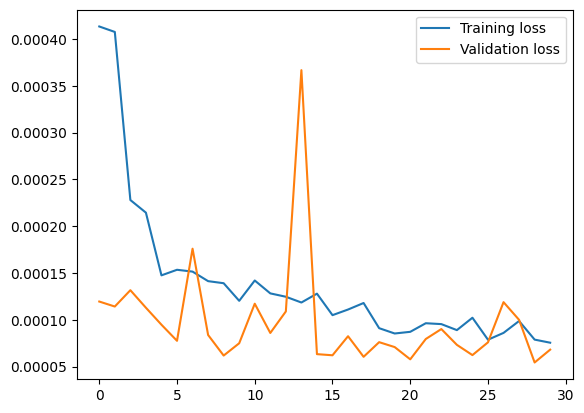

In [74]:
# Try to load weights
try:
    model.load_weights('0dam_lstm_weights.h5')
    print("Loaded model weights from disk")
except:
    print("No weights found, training model from scratch")
    # Fit the model
    history = model.fit(trainX, trainY, epochs=30, batch_size=32,
                    validation_split=0.1, verbose=1)
    # Save model weights after training
    model.save_weights('dam_lstm_weights.h5')

    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.legend()
    plt.show()

57/57 [==============================] - 1s 3ms/step
(1803, 1) (1803, 1)
(1803,)


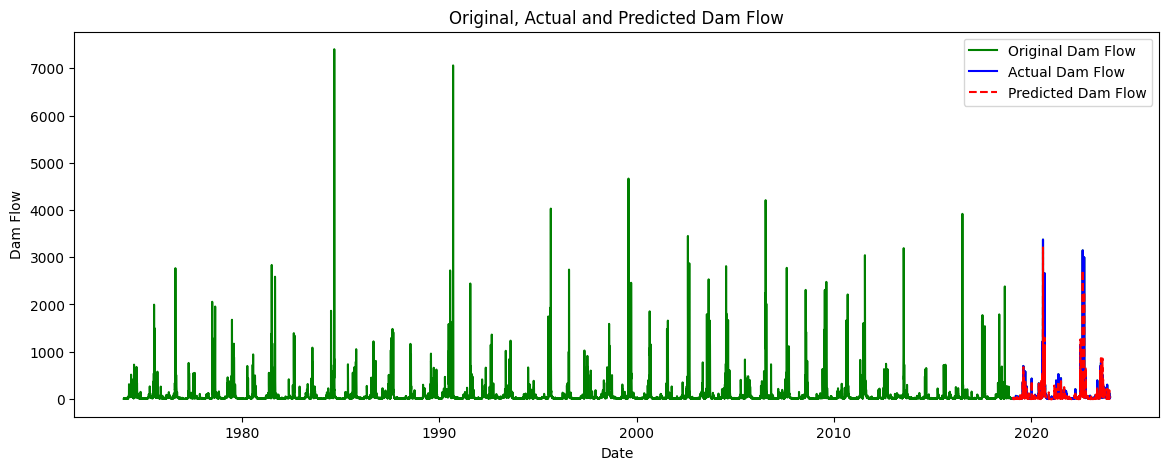

In [75]:
# prediction
prediction = model.predict(testX)
print(prediction.shape, testY.shape)

# generate array filled with means for prediction
# mean_values_pred = np.repeat(scaler.mean_[np.newaxis, :], prediction.shape[0], axis=0)

# # substitute predictions into the first column
# mean_values_pred[:, 0] = np.squeeze(prediction)

# inverse transform
y_pred = scaler_dam.inverse_transform(prediction)[:,0]

# # generate array filled with means for testY
# mean_values_testY = np.repeat(scaler.mean_[np.newaxis, :], testY.shape[0], axis=0)

# # substitute testY into the first column
# mean_values_testY[:, 0] = np.squeeze(testY)

# inverse transform
testY_original = scaler_dam.inverse_transform(testY)[:,0]
print(testY_original.shape)

# plotting
plt.figure(figsize=(14, 5))

# plot original 'Open' prices
plt.plot(dates, original_dam, color='green', label='Original Dam Flow')

# plot actual vs predicted
plt.plot(test_dates[seq_len:], testY_original, color='blue', label='Actual Dam Flow')
plt.plot(test_dates[seq_len:], y_pred, color='red', linestyle='--', label='Predicted Dam Flow')
plt.xlabel('Date')
plt.ylabel('Dam Flow')
plt.title('Original, Actual and Predicted Dam Flow')
plt.legend()
plt.show()

In [76]:
test_dates

16435   2018-12-31
16436   2019-01-01
16437   2019-01-02
16438   2019-01-03
16439   2019-01-04
           ...    
18257   2023-12-27
18258   2023-12-28
18259   2023-12-29
18260   2023-12-30
18261   2023-12-31
Name: date, Length: 1827, dtype: datetime64[ns]

In [77]:
testDates = []
for day in test_dates[24:]:
  testDates.append(day.strftime("%Y-%m-%d"))

testDates = pd.DataFrame(testDates)
pred_y = pd.DataFrame(y_pred)
origin_y = pd.DataFrame(testY_original)

lstm_include_dam = pd.concat([testDates, origin_y, pred_y], axis = 1)
print(lstm_include_dam)

lstm_include_dam = pd.DataFrame(lstm_include_dam)
lstm_include_dam.to_csv("data/lstm_include_dam.csv")

               0       0          0
0     2019-01-24   9.100  -5.825594
1     2019-01-25   9.415  -5.186932
2     2019-01-26   3.257  -4.757801
3     2019-01-27   9.112  -6.113420
4     2019-01-28   3.273  -5.213003
...          ...     ...        ...
1798  2023-12-27  30.518  10.682133
1799  2023-12-28  25.873   9.820863
1800  2023-12-29  21.186   8.048498
1801  2023-12-30  20.887   5.643569
1802  2023-12-31  29.183   7.272144

[1803 rows x 3 columns]


In [78]:
testX_last = []

for x in testX:
  testX_last.append(x[-1])

print(testX_last[0])

testX_last = scaler.inverse_transform(testX_last)
testX_last = pd.DataFrame(testX_last)

print(testX_last)

lstm_include_x = pd.concat([testDates, testX_last,origin_y,pred_y], axis = 1)
lstm_include_x.to_csv("data/lstm_include_x.csv")

[0.00044561 0.         0.         0.         0.         0.        ]
           0    1    2    3    4    5
0      3.300  0.0  0.0  0.0  0.0  0.0
1      9.100  0.0  0.0  0.0  0.0  0.0
2      9.415  0.0  0.0  0.0  0.0  0.0
3      3.257  0.0  0.0  0.0  0.0  0.0
4      9.112  0.0  0.0  0.0  0.0  0.0
...      ...  ...  ...  ...  ...  ...
1798  25.785  0.0  0.0  0.0  0.0  0.0
1799  30.518  0.0  0.0  0.0  0.0  0.0
1800  25.873  0.0  0.0  0.0  0.0  0.0
1801  21.186  0.0  0.0  0.0  0.0  0.0
1802  20.887  0.7  2.3  9.9  6.8  8.5

[1803 rows x 6 columns]


In [79]:
print(lstm_include_x)

               0       0    1    2    3    4    5       0          0
0     2019-01-24   3.300  0.0  0.0  0.0  0.0  0.0   9.100  -5.825594
1     2019-01-25   9.100  0.0  0.0  0.0  0.0  0.0   9.415  -5.186932
2     2019-01-26   9.415  0.0  0.0  0.0  0.0  0.0   3.257  -4.757801
3     2019-01-27   3.257  0.0  0.0  0.0  0.0  0.0   9.112  -6.113420
4     2019-01-28   9.112  0.0  0.0  0.0  0.0  0.0   3.273  -5.213003
...          ...     ...  ...  ...  ...  ...  ...     ...        ...
1798  2023-12-27  25.785  0.0  0.0  0.0  0.0  0.0  30.518  10.682133
1799  2023-12-28  30.518  0.0  0.0  0.0  0.0  0.0  25.873   9.820863
1800  2023-12-29  25.873  0.0  0.0  0.0  0.0  0.0  21.186   8.048498
1801  2023-12-30  21.186  0.0  0.0  0.0  0.0  0.0  20.887   5.643569
1802  2023-12-31  20.887  0.7  2.3  9.9  6.8  8.5  29.183   7.272144

[1803 rows x 9 columns]


In [80]:
# original_data = pd.DataFrame(testY_original)
# prediction_data = pd.DataFrame(y_pred)

# print(original_data)
# print(prediction_data)

# result = pd.concat([original_data,prediction_data],axis=1)
# result.to_csv("/content/drive/MyDrive/240410/result.csv")

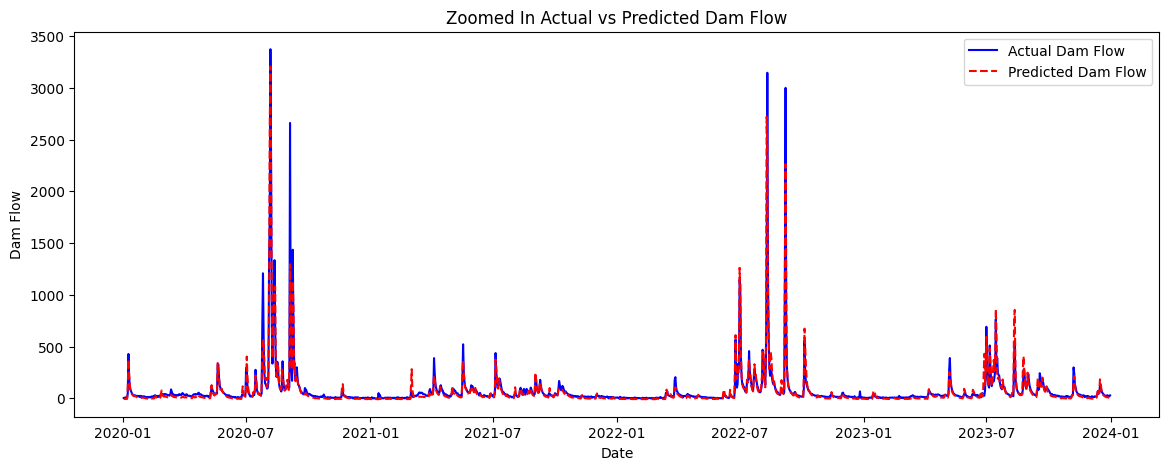

In [81]:
# Calculate the start and end indices for the zoomed plot
zoom_start = len(test_dates) - 365*4
zoom_end = len(test_dates)

# Create the zoomed plot
plt.figure(figsize=(14, 5))

# Adjust the start index for the testY_original and y_pred arrays
adjusted_start = zoom_start - seq_len

plt.plot(test_dates[zoom_start:zoom_end],
         testY_original[adjusted_start:zoom_end - zoom_start + adjusted_start],
         color='blue',
         label='Actual Dam Flow')

plt.plot(test_dates[zoom_start:zoom_end],
         y_pred[adjusted_start:zoom_end - zoom_start + adjusted_start ],
         color='red',
         linestyle='--',
         label='Predicted Dam Flow')

plt.xlabel('Date')
plt.ylabel('Dam Flow')
plt.title('Zoomed In Actual vs Predicted Dam Flow')
plt.legend()
plt.show()

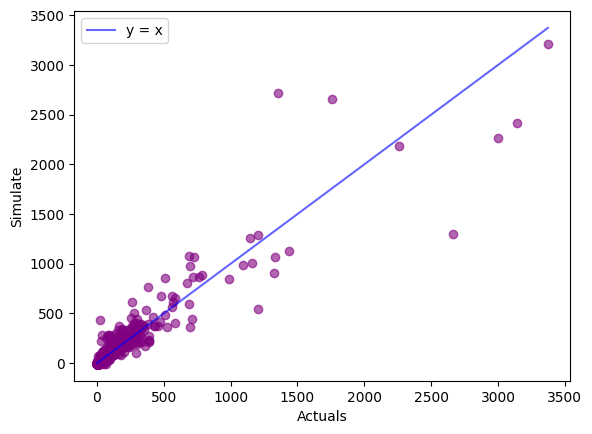

In [82]:
# 일대일 그래프
x = np.arange(0,max(max(testY_original), max(y_pred)))
y = x
plt.scatter(testY_original[:], y_pred[:], color = 'purple', alpha = 0.6)
plt.plot(x,y, color = 'blue', alpha = 0.6, label = 'y = x')
plt.xlabel('Actuals')
plt.ylabel('Simulate')

plt.legend()
plt.show()

In [83]:
#RMSE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(testY_original, y_pred))
print('RMSE : %.2f' %(rmse))

RMSE : 72.15


In [84]:
# NSE
from numpy import mean
num_sum1 = 0
num_sum2 = 0
num_avg = mean(testY_original[:])
for i in range(len(testY_original)):
  num1 = testY_original[i] - y_pred[i]
  num_sum1 += num1**2
  num2 = testY_original[i] - num_avg
  num_sum2 += num2**2

nse = 1 - (num_sum1 / num_sum2)
print('NSE : %f' %nse)

NSE : 0.868683


In [85]:
# PBIAS
num_sum1 = 0
for i in range(len(testY_original)):
  num1 = testY_original[i] - y_pred[i]
  num_sum1 += num1

pbias = (num_sum1 / np.sum(testY_original[:])) * 100
print('PBIAS : %f' %pbias)

PBIAS : 8.746390


In [86]:
#R^2
import math

num_sum1 = 0
num_sum2 = 0
num_sum3 = 0
act_avg = mean(testY_original[:])
pred_avg = mean(y_pred[:])
for i in range(len(testY_original)):
  num1 = (testY_original[i] - act_avg) * (y_pred[i] - pred_avg)
  num_sum1 += num1
  num2 = testY_original[i] - pred_avg
  num_sum2 += num2**2
  num3 = y_pred[i] - pred_avg
  num_sum3 += num3**2

r_square = (num_sum1 / (math.sqrt(num_sum2)* math.sqrt(num_sum3)))**2
print('R Square : %f' %r_square)

R Square : 0.870861
